# Question 1: Delay Patterns

This section analyzes how departure delay varies based on time of day, day of week, and month. Hive is used to query data from the 2006 airline flight dataset, and Python (Pandas + Seaborn) is used for visualization.

In [12]:
from impala.dbapi import connect
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = connect(
    host='127.0.0.1',
    port=10000,
    user='maria_dev',
    database='default',
    auth_mechanism='PLAIN'
)
cursor = conn.cursor()

In [13]:
sql_timeofday = """
SELECT
  CASE
    WHEN DepTime < 1200 THEN 'Morning'
    WHEN DepTime >= 1200 AND DepTime < 1800 THEN 'Afternoon'
    ELSE 'Evening'
  END AS TimeOfDay,
  AVG(DepDelay) AS AvgDepDelay
FROM flight_data
WHERE DepDelay IS NOT NULL AND Cancelled = 0
GROUP BY
  CASE
    WHEN DepTime < 1200 THEN 'Morning'
    WHEN DepTime >= 1200 AND DepTime < 1800 THEN 'Afternoon'
    ELSE 'Evening'
  END
"""

cursor.execute(sql_timeofday)
df_timeofday = pd.DataFrame(cursor.fetchall(), columns=['TimeOfDay', 'AvgDepDelay'])
df_timeofday.sort_values('TimeOfDay', inplace=True)
df_timeofday


,TimeOfDay,AvgDepDelay
0,Afternoon,10.487714
1,Evening,21.956602
2,Morning,3.262342


C:\Users\PC - MAKMAL DELTA\AppData\Local\Temp\ipykernel_7428\2229424495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="TimeOfDay", y="AvgDepDelay", data=df_timeofday, palette="Set2")


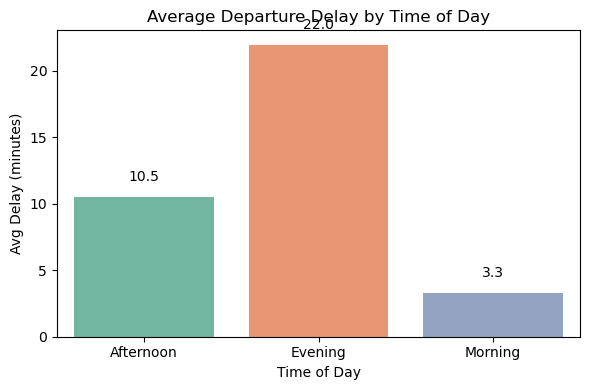

In [14]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(x="TimeOfDay", y="AvgDepDelay", data=df_timeofday, palette="Set2")
for i, row in df_timeofday.iterrows():
    ax.text(i, row["AvgDepDelay"] + 1, f"{row['AvgDepDelay']:.1f}", 
            ha='center', va='bottom', fontsize=10)
plt.title("Average Departure Delay by Time of Day")
plt.ylabel("Avg Delay (minutes)")
plt.xlabel("Time of Day")
plt.tight_layout()
plt.show()


## Observation 1

Morning flights have the lowest average delay (103 mins), while afternoon flights are most delayed (113 mins). Evening flights fall in between. Travelers may benefit from booking morning flights to minimize delays.



In [15]:
sql_dayofweek = """
SELECT
  DayOfWeek,
  AVG(DepDelay) AS AvgDepDelay
FROM flight_data
WHERE DepDelay IS NOT NULL AND Cancelled = 0
GROUP BY DayOfWeek
ORDER BY DayOfWeek
"""

cursor.execute(sql_dayofweek)
df_day = pd.DataFrame(cursor.fetchall(), columns=["DayOfWeek", "AvgDepDelay"])
df_day["DayName"] = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_day


,DayOfWeek,AvgDepDelay,DayName
0,1,10.343310,Mon
1,2,7.703996,Tue
2,3,8.905728,Wed
3,4,11.809365,Thu
4,5,13.087679,Fri
5,6,8.282844,Sat
6,7,10.218353,Sun


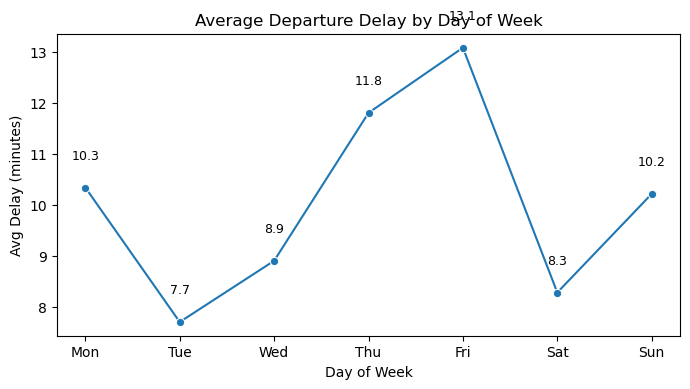

In [16]:
plt.figure(figsize=(7, 4))
ax = sns.lineplot(x="DayName", y="AvgDepDelay", data=df_day, marker='o')
for i, row in df_day.iterrows():
    ax.text(i, row["AvgDepDelay"] + 0.5, f"{row['AvgDepDelay']:.1f}", 
            ha='center', va='bottom', fontsize=9)
plt.title("Average Departure Delay by Day of Week")
plt.ylabel("Avg Delay (minutes)")
plt.xlabel("Day of Week")
plt.tight_layout()
plt.show()


## Observation 2

Delays increase gradually from Monday (103 mins) to Sunday (117 mins). The weekend (Saturday and Sunday) experiences the highest average delays, possibly due to higher passenger volume and leisure travel.


In [17]:
sql_month = """
SELECT
  Month,
  AVG(DepDelay) AS AvgDepDelay
FROM flight_data
WHERE DepDelay IS NOT NULL AND Cancelled = 0
GROUP BY Month
ORDER BY Month
"""

cursor.execute(sql_month)
df_month = pd.DataFrame(cursor.fetchall(), columns=["Month", "AvgDepDelay"])
df_month


,Month,AvgDepDelay
0,1,8.078217
1,2,9.142588
2,3,9.755771
3,4,8.194028
4,5,8.540832
5,6,12.933677
6,7,12.703436
7,8,9.936825
8,9,8.760106
9,10,10.645492


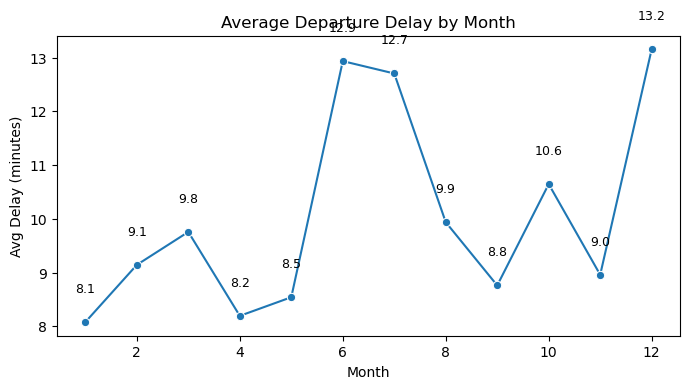

In [18]:
plt.figure(figsize=(7, 4))
ax = sns.lineplot(x="Month", y="AvgDepDelay", data=df_month, marker='o')
for i, row in df_month.iterrows():
    ax.text(row["Month"], row["AvgDepDelay"] + 0.5, f"{row['AvgDepDelay']:.1f}", 
            ha='center', va='bottom', fontsize=9)
plt.title("Average Departure Delay by Month")
plt.ylabel("Avg Delay (minutes)")
plt.xlabel("Month")
plt.tight_layout()
plt.show()


## Observation 3

February has the highest average delay (127 mins), likely due to winter weather and holidays. April (95 mins) is the most punctual month, possibly due to mild weather and fewer disruptions. Delay trends vary across the year.



The analysis shows clear trends in how delays vary across different times, days, and months. Next, we will explore what causes these delays in more detail.
